# Exploring Warrington's Air Quality Data
---
## A1 Data Wrangling

JWriggy

**data: © Crown 2020 copyright Defra via uk-air.defra.gov.uk, licenced under the [Open Government Licence (OGL)](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/2/)**

**Air pollutant measurements from the Automatic Urban and Rural Network (AURN) are available for download as ready formatted R objects together with some modelled meteorological data. The importAURN utility from the [openair](https://github.com/davidcarslaw/openair) package, courtesy of David Carslaw is available to import the data from selected sites and years. For this analysis 10 sites were chosen from the North West of England measuring background air pollutants (ie away from the kerbside where traffic effects might dominate). These all had over ten years worth of hourly measurements though not all pollutants are measured at each site.**

**The data were imported as R objects and written out to csv files for analysis with python. The code below reads these into pandas dataframes. Some checks are done to identify missing data and the data is aggregated for each pollutant of interest for later analysis. (Approx 30 MB)**


In [1]:
import pandas as pd
import glob

import seaborn as sns
import matplotlib.pyplot as plt

# limit display to 2 dp
pd.options.display.float_format = '{:,.2f}'.format 
# for styling tables
cm = sns.light_palette("#b0c4de", as_cmap=True)

##  Load the raw csv files into pandas dataframes

In [2]:
glob.glob("data/*.csv") # list datafiles

['data/BLC220.csv',
 'data/TRAN20.csv',
 'data/MAN320.csv',
 'data/GLAZ20.csv',
 'data/LVP20.csv',
 'data/PRES20.csv',
 'data/ECCL20.csv',
 'data/WAR20.csv',
 'data/LB20.csv',
 'data/WIG520.csv']

In [3]:
## csv files total approx 110MB
# 2009-sep20
WAR  = pd.read_csv('data/WAR20.csv',  index_col=["date", "site"],  parse_dates=True, infer_datetime_format=True) 
GLAZ = pd.read_csv('data/GLAZ20.csv', index_col=["date", "site"],  parse_dates=True, infer_datetime_format=True)
LVP  = pd.read_csv('data/LVP20.csv',  index_col=["date", "site"],  parse_dates=True, infer_datetime_format=True) 
ECCL = pd.read_csv('data/ECCL20.csv', index_col=["date", "site"],  parse_dates=True, infer_datetime_format=True) 
WIG5 = pd.read_csv('data/WIG520.csv', index_col=["date", "site"],  parse_dates=True, infer_datetime_format=True) 
MAN3 = pd.read_csv('data/MAN320.csv', index_col=["date", "site"],  parse_dates=True, infer_datetime_format=True) 
LB   = pd.read_csv('data/LB20.csv',   index_col=["date", "site"],  parse_dates=True, infer_datetime_format=True) 
BLC2 = pd.read_csv('data/BLC220.csv', index_col=['date','site'],  parse_dates=True, infer_datetime_format=True) 
TRAN = pd.read_csv('data/TRAN20.csv', index_col=['date','site'],  parse_dates=True, infer_datetime_format=True) 
PRES = pd.read_csv('data/PRES20.csv', index_col=['date','site'],  parse_dates=True, infer_datetime_format=True) 

In [4]:
# a look at the raw data
WAR.head()

,,pm10,no,no2,nox,nv10,nv2.5,pm2.5,v10,v2.5,code,temp,ws,wd,at10,ap10,at25,ap25
date,site,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,Warrington,69.00,35.00,52.00,105.00,56.00,53.00,59.00,13.00,6.00,WAR,nan,nan,nan,nan,nan,nan,nan
2009-01-01 01:00:00,Warrington,53.00,16.00,44.00,69.00,43.00,40.00,47.00,10.00,7.00,WAR,nan,nan,nan,nan,nan,nan,nan
2009-01-01 02:00:00,Warrington,48.00,26.00,46.00,86.00,39.00,34.00,42.00,9.00,8.00,WAR,nan,nan,nan,nan,nan,nan,nan
2009-01-01 03:00:00,Warrington,56.00,18.00,53.00,80.00,48.00,42.00,50.00,8.00,8.00,WAR,nan,nan,nan,nan,nan,nan,nan
2009-01-01 04:00:00,Warrington,52.00,20.00,57.00,88.00,44.00,42.00,50.00,8.00,8.00,WAR,nan,nan,nan,nan,nan,nan,nan


In [5]:
WAR.tail()

,,pm10,no,no2,nox,nv10,nv2.5,pm2.5,v10,v2.5,code,temp,ws,wd,at10,ap10,at25,ap25
date,site,,,,,,,,,,,,,,,,,
2020-10-01 19:00:00,Warrington,16.43,22.08,43.99,77.84,nan,nan,13.00,nan,nan,WAR,8.00,2.60,80.60,nan,nan,nan,nan
2020-10-01 20:00:00,Warrington,21.26,30.31,54.89,101.36,nan,nan,16.00,nan,nan,WAR,7.40,3.00,78.20,nan,nan,nan,nan
2020-10-01 21:00:00,Warrington,19.32,25.69,50.87,90.27,nan,nan,14.00,nan,nan,WAR,6.80,2.90,80.60,nan,nan,nan,nan
2020-10-01 22:00:00,Warrington,19.32,18.96,47.81,76.88,nan,nan,11.00,nan,nan,WAR,6.30,3.10,70.90,nan,nan,nan,nan
2020-10-01 23:00:00,Warrington,18.36,10.85,44.94,61.58,nan,nan,9.00,nan,nan,WAR,6.30,3.50,70.70,nan,nan,nan,nan


In [6]:
GLAZ.head(2)

,,no,no2,nox,o3,code,temp,ws,wd
date,site,,,,,,,,
2009-01-01 00:00:00,Glazebury,nan,nan,nan,nan,GLAZ,nan,nan,nan
2009-01-01 01:00:00,Glazebury,nan,nan,nan,2.00,GLAZ,nan,nan,nan


### site meta data

In [34]:
sites = pd.DataFrame({  'code' : ["WAR","GLAZ","LVP","ECCL","WIG5",  "MAN3","TRAN", "PRES","BLC2","LB"]
                   ,'site_name' : ["Warrington","Glazebury","Liverpool Speke","Salford Eccles","Wigan Centre"
                                   ,"Manchester Piccadilly", "Wirral Tranmere","Preston","Blackpool Marton","Ladybower"] 
                    ,'site_label' : ["Warrington","Glazebury","Speke","Salford","Wigan"
                                   ,"Manchester", "Wirral","Preston","Blackpool","Ladybower"] 
                    ,'site_type' : ["urban industrial background","rural background","urban industrial background","urban background","urban background"
                                   ,"urban background", "urban background","urban background","urban background","rural background"] 
                    ,'lat' : [53.38928, 53.46008, 53.34633, 53.48481, 53.54914,
                              53.48152, 53.37287, 53.76559, 53.80489, 53.40337]
                    ,'lon' : [-2.615358, -2.472056, -2.844333,-2.334139,-2.638139,
                              -2.237881, -3.022722, -2.680353,-3.007175,-1.752006] })
# write to file
#sites.to_csv('data/sites.csv', index=False)
sites

,code,site_name,site_label,site_type,lat,lon
0,WAR,Warrington,Warrington,urban industrial background,53.39,-2.62
1,GLAZ,Glazebury,Glazebury,rural background,53.46,-2.47
2,LVP,Liverpool Speke,Speke,urban industrial background,53.35,-2.84
3,ECCL,Salford Eccles,Salford,urban background,53.48,-2.33
4,WIG5,Wigan Centre,Wigan,urban background,53.55,-2.64
5,MAN3,Manchester Piccadilly,Manchester,urban background,53.48,-2.24
6,TRAN,Wirral Tranmere,Wirral,urban background,53.37,-3.02
7,PRES,Preston,Preston,urban background,53.77,-2.68
8,BLC2,Blackpool Marton,Blackpool,urban background,53.80,-3.01
9,LB,Ladybower,Ladybower,rural background,53.40,-1.75


### Transforming the data

Aggregate data into 1 dataframe for each pollutant of interest

## 1. NO2 Data

In [8]:
POLL = 'no2'
s = pd.concat([   WAR[POLL], LVP[POLL],  ECCL[POLL], PRES[POLL] , BLC2[POLL],
               TRAN[POLL] , WIG5[POLL], MAN3[POLL], LB[POLL] ,  GLAZ[POLL] ]) 
no2dat = pd.DataFrame({POLL : s})
# set up table with sites as column
no2dat = pd.pivot_table(no2dat, values = POLL, index = ['date'], columns = ['site'])

In [9]:
no2dat.tail(2)

site,Blackpool Marton,Glazebury,Ladybower,Liverpool Speke,Manchester Piccadilly,Preston,Salford Eccles,Warrington,Wigan Centre,Wirral Tranmere
date,,,,,,,,,,
2020-10-01 22:00:00,6.50,29.84,13.20,nan,30.98,26.20,40.16,47.81,8.22,50.49
2020-10-01 23:00:00,5.74,21.23,19.12,nan,20.46,20.46,26.20,44.94,8.03,46.09


In [10]:
no2dat.head(2)

site,Blackpool Marton,Glazebury,Ladybower,Liverpool Speke,Manchester Piccadilly,Preston,Salford Eccles,Warrington,Wigan Centre,Wirral Tranmere
date,,,,,,,,,,
2009-01-01 00:00:00,42.00,nan,nan,nan,nan,nan,63.00,52.00,53.00,nan
2009-01-01 01:00:00,44.00,nan,56.00,nan,nan,nan,59.00,44.00,55.00,nan


### NO2 data checks

In [11]:
no2dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
site,,,,,,,,
Blackpool Marton,"88,177.00",15.49,14.00,-0.76,6.00,10.85,19.46,145.00
Glazebury,"94,895.00",15.41,14.13,-0.76,5.50,10.66,20.69,165.00
Ladybower,"87,791.00",8.74,8.24,-2.10,3.30,6.27,11.40,90.20
Liverpool Speke,"97,559.00",22.00,16.86,0.00,10.00,17.00,29.00,157.00
Manchester Piccadilly,"98,572.00",38.71,19.08,1.21,23.65,36.23,52.00,456.78
Preston,"95,855.00",25.05,18.11,-0.38,12.21,19.68,32.40,262.00
Salford Eccles,"94,541.00",29.06,20.96,-2.11,13.41,23.49,39.84,399.00
Warrington,"99,205.00",22.15,16.24,0.00,10.47,17.94,29.81,371.00
Wigan Centre,"100,479.00",21.19,17.14,-0.99,8.00,15.96,30.94,157.00


<p style="color:red">Negative values due to calibration errors? Leave unchanged for now as may provide more accurate means when averaging.</p>

In [12]:
# count of records with negative values
no2dat[no2dat<0].count()

site
Blackpool Marton           3
Glazebury                157
Ladybower                198
Liverpool Speke            0
Manchester Piccadilly      0
Preston                    1
Salford Eccles            33
Warrington                 0
Wigan Centre              20
Wirral Tranmere            5
dtype: int64

In [13]:
# Percentage missing data
print(no2dat.shape)
no2dat.isnull().sum() * 100/no2dat.shape[0] 

(103008, 10)


site
Blackpool Marton        14.40
Glazebury                7.88
Ladybower               14.77
Liverpool Speke          5.29
Manchester Piccadilly    4.31
Preston                  6.94
Salford Eccles           8.22
Warrington               3.69
Wigan Centre             2.46
Wirral Tranmere         37.31
dtype: float64

In [14]:
# number of days with < 20 x hourly records
(no2dat.resample('D').count()<20).sum()

site
Blackpool Marton          562
Glazebury                 365
Ladybower                 657
Liverpool Speke           223
Manchester Piccadilly     186
Preston                   303
Salford Eccles            339
Warrington                147
Wigan Centre              117
Wirral Tranmere          1615
dtype: int64

### Annual record counts
A normal (not leap) year has 8760 hours 

In [15]:
# count records grouped by year and site
df = no2dat
dfc = df.groupby([df.index.year]).count()
print("                 NO2 record counts")
dfc.transpose().style.background_gradient(cmap=cm)

                 NO2 record counts


date,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
site,,,,,,,,,,,,
Blackpool Marton,6141,1409,7249,8377,8403,8499,8343,8470,8488,8147,8127,6524
Glazebury,8242,8648,8502,6704,8636,7896,8048,8707,7790,6843,8492,6387
Ladybower,6781,8246,8191,8582,8670,6844,384,8641,8667,8049,8210,6526
Liverpool Speke,8234,8231,8477,7528,8304,7973,8555,8627,8660,8687,8653,5630
Manchester Piccadilly,8027,8355,8489,7797,8197,8452,8623,8332,8414,8682,8659,6545
Preston,6822,6517,8580,8503,8103,7614,8682,8603,8615,8679,8669,6468
Salford Eccles,5727,7534,7574,7810,8383,8332,8610,8425,8419,8645,8510,6572
Warrington,8448,8674,8467,8480,8374,8697,8478,8711,8526,8080,7679,6591
Wigan Centre,8648,8701,8566,8737,8576,8592,8443,7904,8689,8559,8489,6575


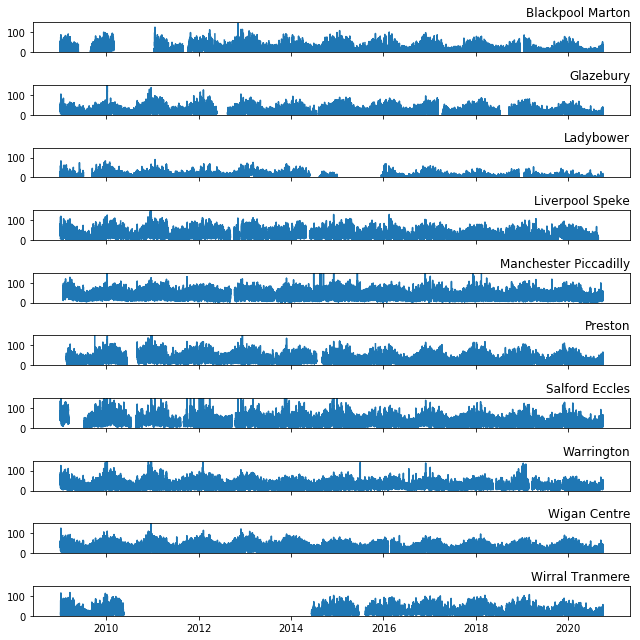

In [16]:
# a quick overview
fig, axs = plt.subplots(10,1, sharex=True, figsize=(9,9))
for i,ax in enumerate(axs):
    site = no2dat.columns[i]
    ax.set_title(site,loc='right')
    ax.set_ylim(0,150)
    ax.plot(no2dat[site])
    plt.tight_layout() 

<p style="color:red">NB latest 6 months data not yet validated.  Outliers for Manchester, Preston, Salford and Warrington.</p>

---

## 2. PM data

In [17]:
POLL = 'pm2.5'
s = pd.concat([   WAR[POLL], LVP[POLL],  ECCL[POLL], PRES[POLL] , BLC2[POLL],
               TRAN[POLL] , WIG5[POLL], MAN3[POLL] ] )
#, LB[POLL] ,  GLAZ[POLL] ]) # no pm data
pm25dat = pd.DataFrame({POLL : s})
# set up table with sites as column
pm25dat = pd.pivot_table(pm25dat, values = POLL, index = ['date'], columns = ['site'])

# group by year and site
df = pm25dat
dfc = df.groupby([df.index.year]).count()
print("                 PM2.5 record counts")
dfc.transpose().style.background_gradient(cmap=cm)

                 PM2.5 record counts


date,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
site,,,,,,,,,,,,
Blackpool Marton,7318,1411,5210,5971,0,5933,7710,8214,8546,7370,7480,6537
Liverpool Speke,7854,7331,8466,8348,8636,7734,8356,8081,8478,8503,8355,5653
Manchester Piccadilly,7142,2273,7807,8498,6934,8430,7991,7355,8242,8302,8072,6252
Preston,6588,8153,7743,7990,7466,6829,7804,8427,8232,8377,8526,6548
Salford Eccles,8464,8071,7747,8223,8600,8319,8521,8166,8336,7310,8754,6592
Warrington,8390,8428,8385,8260,8309,7007,8091,8453,7991,7874,5989,6289
Wigan Centre,7042,3997,0,6507,8424,6993,6639,5634,7917,6807,8416,6589
Wirral Tranmere,6886,8197,8478,8629,8429,5690,8431,8283,8315,8224,8477,6551


<p style="color:red">Significant gaps in record for some sites - particularly Blackpool and Wigan. Warrington missing 2019 data.</p>

In [18]:
pm25dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
site,,,,,,,,
Blackpool Marton,"71,700.00",8.74,9.47,-4.80,3.40,6.00,10.70,236.00
Liverpool Speke,"95,795.00",10.13,10.59,-5.00,4.30,7.00,12.00,611.50
Manchester Piccadilly,"87,298.00",11.44,11.63,-4.00,5.00,8.40,14.20,449.10
Preston,"92,683.00",10.29,9.93,-4.20,4.90,7.36,12.20,452.00
Salford Eccles,"97,103.00",12.42,11.38,-4.60,6.00,9.20,15.00,451.80
Warrington,"93,466.00",11.42,10.61,-4.00,5.30,8.00,13.70,381.00
Wigan Centre,"74,965.00",11.57,11.28,-4.00,5.00,8.30,14.20,448.40
Wirral Tranmere,"94,590.00",8.50,9.41,-4.00,3.00,5.60,10.10,206.00


In [19]:
# count of records with negative values
pm25dat[pm25dat<0].count()

site
Blackpool Marton         1788
Liverpool Speke           820
Manchester Piccadilly    1610
Preston                   462
Salford Eccles            186
Warrington                451
Wigan Centre              471
Wirral Tranmere          2501
dtype: int64

<p style="color:red">Negative values - due to calibration errors? Leave unchanged for now as may provide more accurate means when averaging.</p>

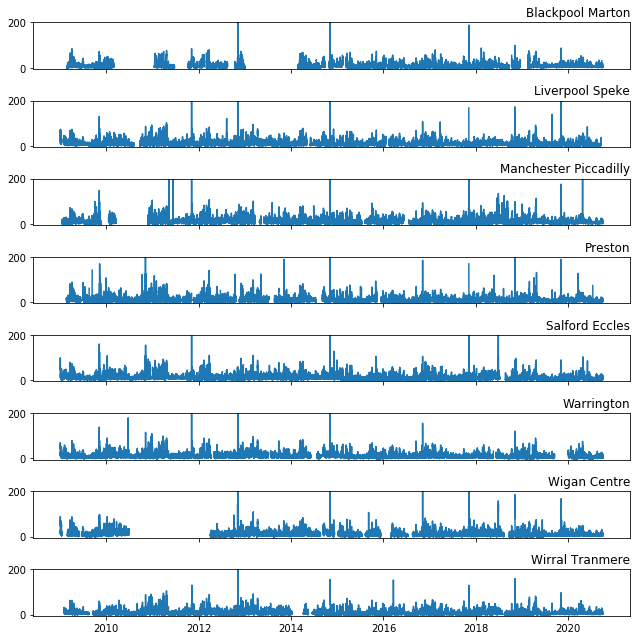

In [20]:
# a quick overview
fig, axs = plt.subplots(8,1, sharex=True, figsize=(9,9))
for i,ax in enumerate(axs):
    site = pm25dat.columns[i]
    ax.set_title(site,loc='right')
    ax.set_ylim(-5,200)
    ax.plot(pm25dat[site])
    plt.tight_layout() 

<p style="color:red">Outliers - check</p>

---

In [21]:
POLL = 'pm10'
s = pd.concat([   WAR[POLL], LVP[POLL],  ECCL[POLL]
#               , PRES[POLL] , BLC2[POLL], TRAN[POLL], MAN3[POLL] # no pm10 data after 2009
#                , WIG5[POLL], LB[POLL] ,  GLAZ[POLL] ]) # no pm10 data
              ])
pm10dat = pd.DataFrame({POLL : s})
# set up table with sites as column
pm10dat = pd.pivot_table(pm10dat, values = POLL, index = ['date'], columns = ['site'])

print(pm10dat.describe().transpose())

# group by year and site
dfc = pm10dat.groupby([pm10dat.index.year]).count()
print("                 PM10 record counts")
dfc.transpose().style.background_gradient(cmap=cm)

                    count  mean   std   min  25%   50%   75%    max
site                                                               
Liverpool Speke 94,825.00 14.73 12.21 -4.00 7.70 11.59 18.20 692.10
Salford Eccles  97,970.00 17.00 13.37 -4.00 9.10 13.93 21.00 651.30
Warrington      89,547.00 16.71 12.03 -3.30 9.30 13.53 20.29 357.00
                 PM10 record counts


date,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
site,,,,,,,,,,,,
Liverpool Speke,7651,7106,8471,8587,8628,7519,8249,8014,8397,8184,8229,5790
Salford Eccles,8552,8635,8200,7970,8580,8460,8386,7894,8388,7559,8754,6592
Warrington,8139,4880,7973,8318,8141,7712,8441,8277,7028,6114,8240,6284


<p style="color:red">Significant gaps in the data in 2010 and 2018 for Warrington</p>

In [22]:
# count of records with negative values
pm10dat[pm10dat<0].count()

site
Liverpool Speke    340
Salford Eccles     139
Warrington          97
dtype: int64

<p style="color:red">Negative Values</p>

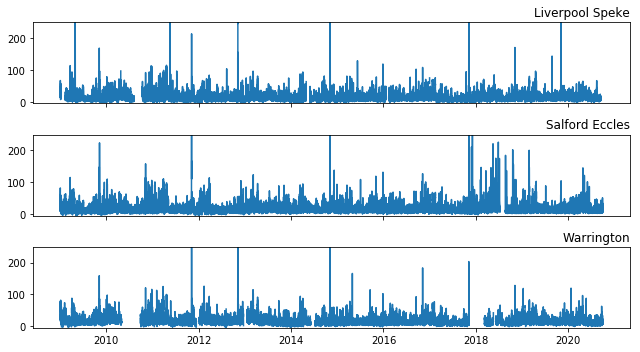

In [23]:
# a quick overview
fig, axs = plt.subplots(3,1, sharex=True, figsize=(9,5))
for i,ax in enumerate(axs):
    site = pm10dat.columns[i]
    ax.set_title(site,loc='right')
    ax.set_ylim(-5,250)
    ax.plot(pm10dat[site])
    plt.tight_layout() 

---

## 3. Ozone Data

In [24]:
POLL = 'o3'
s = pd.concat([   #WAR[POLL], # no ozone data 
                LVP[POLL],  ECCL[POLL]
                , PRES[POLL] , BLC2[POLL], TRAN[POLL], MAN3[POLL]
                , WIG5[POLL], LB[POLL] ,  GLAZ[POLL] ]) 
o3dat = pd.DataFrame({POLL : s})
o3dat = pd.pivot_table(o3dat, values = POLL, index = ['date'], columns = ['site'])

In [25]:
o3dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
site,,,,,,,,
Blackpool Marton,"92,650.00",54.73,23.66,0.00,40.00,58.00,71.40,177.77
Glazebury,"97,581.00",43.42,25.04,-1.05,24.00,45.40,62.00,181.71
Ladybower,"89,613.00",53.64,19.54,-1.70,41.16,54.00,66.00,169.19
Liverpool Speke,"99,736.00",47.45,22.77,0.00,32.08,49.34,63.76,166.74
Manchester Piccadilly,"100,868.00",28.94,20.21,0.00,12.00,26.92,43.15,138.55
Preston,"99,862.00",45.18,23.27,-0.10,28.54,46.20,62.00,181.16
Salford Eccles,"42,554.00",31.64,22.94,-1.00,12.00,28.44,48.00,156.00
Wigan Centre,"99,905.00",44.26,26.40,-0.07,22.88,46.00,64.01,204.86
Wirral Tranmere,"75,371.00",48.33,22.23,0.00,33.81,49.69,64.00,169.48


In [26]:
# count of records with negative values
o3dat[o3dat<0].count()

site
Blackpool Marton           0
Glazebury                125
Ladybower                 20
Liverpool Speke            0
Manchester Piccadilly      0
Preston                    1
Salford Eccles             8
Wigan Centre               1
Wirral Tranmere            0
dtype: int64

In [27]:
# group by year and site
dfc = o3dat.groupby([o3dat.index.year]).count()
print("                 Ozone record counts")
dfc.transpose().style.background_gradient(cmap=cm)

                 Ozone record counts


date,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
site,,,,,,,,,,,,
Blackpool Marton,8576,1411,7419,8687,8690,8618,8680,8702,8657,8329,8361,6520
Glazebury,8527,8664,8670,7862,8609,8697,8165,8676,8690,6921,8401,5699
Ladybower,8352,8265,8598,8700,8684,8520,383,8323,8158,6882,8406,6342
Liverpool Speke,8583,8613,8658,8543,8607,7973,8565,8583,8581,8685,8651,5694
Manchester Piccadilly,8490,8510,8681,8577,8643,8628,8631,8528,8325,8655,8651,6549
Preston,8102,8496,8694,8715,8555,7630,8564,8706,8585,8638,8690,6487
Salford Eccles,8572,8540,8231,8647,8564,0,0,0,0,0,0,0
Wigan Centre,8521,8641,8137,8746,8676,8519,8526,7495,8695,8663,8711,6575
Wirral Tranmere,8371,3129,0,0,7934,8676,7462,8542,7764,8254,8699,6540


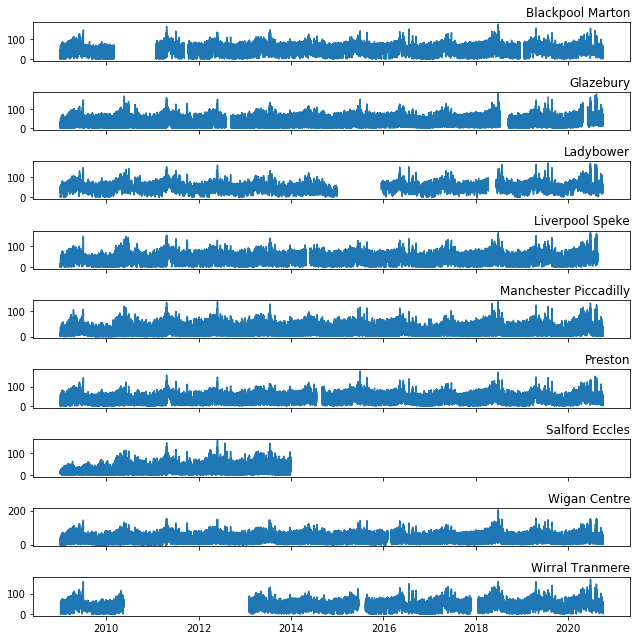

In [28]:
# a quick overview
fig, axs = plt.subplots(9,1, sharex=True, figsize=(9,9))
for i,ax in enumerate(axs):
    site = o3dat.columns[i]
    ax.set_title(site,loc='right')
    ax.plot(o3dat[site])
    plt.tight_layout() 

In [29]:
o3dat.head()

site,Blackpool Marton,Glazebury,Ladybower,Liverpool Speke,Manchester Piccadilly,Preston,Salford Eccles,Wigan Centre,Wirral Tranmere
date,,,,,,,,,
2009-01-01 00:00:00,6.00,nan,nan,nan,nan,2.00,10.00,0.00,nan
2009-01-01 01:00:00,6.00,2.00,4.00,0.00,2.00,8.00,10.00,0.00,nan
2009-01-01 02:00:00,0.00,2.00,2.00,0.00,2.00,0.00,12.00,0.00,nan
2009-01-01 03:00:00,0.00,2.00,14.00,0.00,2.00,2.00,8.00,0.00,nan
2009-01-01 04:00:00,0.00,2.00,22.00,0.00,2.00,2.00,10.00,0.00,nan


In [30]:
# drop Salford as missing so much data
o3dat = o3dat.drop('Salford Eccles', axis=1)
o3dat.head(2)

site,Blackpool Marton,Glazebury,Ladybower,Liverpool Speke,Manchester Piccadilly,Preston,Wigan Centre,Wirral Tranmere
date,,,,,,,,
2009-01-01 00:00:00,6.00,nan,nan,nan,nan,2.00,0.00,nan
2009-01-01 01:00:00,6.00,2.00,4.00,0.00,2.00,8.00,0.00,nan


---

## 4. Meteorological Data

In [31]:
POLL = 'ws' # modelled wind speed
s = pd.concat([   WAR[POLL], LVP[POLL],  ECCL[POLL], PRES[POLL] , BLC2[POLL],
               TRAN[POLL] , WIG5[POLL], MAN3[POLL], LB[POLL] ,  GLAZ[POLL] ]) 
wsdat = pd.DataFrame({POLL : s})
# set up table with sites as column
wsdat = pd.pivot_table(wsdat, values = POLL, index = ['date'], columns = ['site'])

wsdat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
site,,,,,,,,
Blackpool Marton,"86,355.00",5.62,3.16,0.00,3.30,5.10,7.30,24.70
Glazebury,"86,379.00",4.41,2.53,0.00,2.50,4.00,5.90,19.00
Ladybower,"86,379.00",6.39,3.11,0.00,4.20,5.90,8.10,22.50
Liverpool Speke,"86,355.00",3.55,1.90,0.00,2.10,3.20,4.70,13.40
Manchester Piccadilly,"86,355.00",3.40,1.86,0.00,2.00,3.10,4.50,13.80
Preston,"86,355.00",5.16,2.80,0.00,3.10,4.70,6.70,22.80
Salford Eccles,"86,379.00",4.12,2.27,0.00,2.50,3.70,5.40,19.40
Warrington,"86,307.00",4.50,2.49,0.00,2.70,4.10,5.90,19.30
Wigan Centre,"86,331.00",4.65,2.33,0.00,3.00,4.30,6.00,19.50


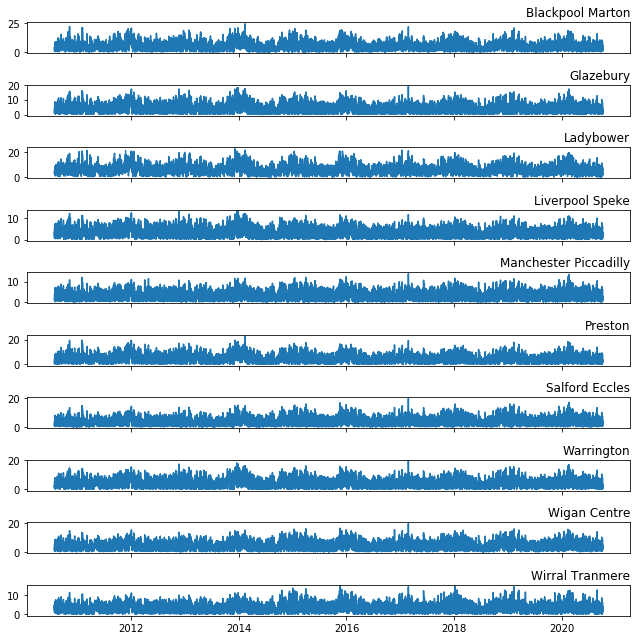

In [32]:
# a quick overview
fig, axs = plt.subplots(10,1, sharex=True, figsize=(9,9))
for i,ax in enumerate(axs):
    site = wsdat.columns[i]
    ax.set_title(site,loc='right')
    ax.plot(wsdat[site])
    plt.tight_layout() 

<p style="color:red"> Modelled wind speed from late 2010 only</p>

---

## If ok write transformed data to file

In [33]:
# write to file
no2dat.to_csv('data/no2dat.csv', index = True)
pm25dat.to_csv('data/pm25dat.csv', index = True)
pm10dat.to_csv('data/pm10dat.csv', index = True)
o3dat.to_csv('data/o3dat.csv', index = True)
wsdat.to_csv('data/wsdat.csv', index = True)

## Notes
- NO2 data for 10 sites. Wirral, Ladybower and Blackpool have large gaps. 
- PM25 data for 8 sites, Blackpool and Wigan have large gaps. Large outliers to investigate. 
- PM10 data only for 3 sites, significant gaps 2010 and 2018 for Warrington 
- Ozone data for 8 sites, large gaps for Wirral, Ladybower and Blackpool
- Wind speed data for 10 sites from late 2010

- There are some negative values - due to calibration errors? Left unchanged. Numbers not significant overall.
- Latest 6 months data not yet validated. Treat with caution